In [1]:
# Загрузка зависимостей
import numpy
import pandas
import matplotlib.pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Загрузка и анализ набора данных
raw_dataset = pandas.read_csv('machine.data.csv', header=None) # Убедиться в правильности пути к файлу!
raw_dataset.head(10) # Вывод первых 10 строк

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [3]:
# Размер набора данных
print(raw_dataset.shape)

(209, 10)


In [4]:
# Создаем набор данных, в котором будут храниться обработанные данные
dataset = pandas.DataFrame()

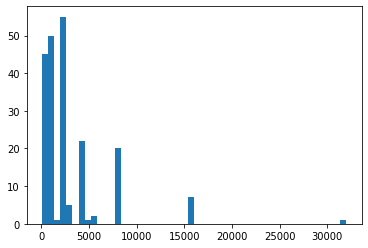

In [5]:
# Обработка данных в столбце №3 (MMIN: minimum main memory in kilobytes (integer))

# Загружаем данные
data = raw_dataset[3]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

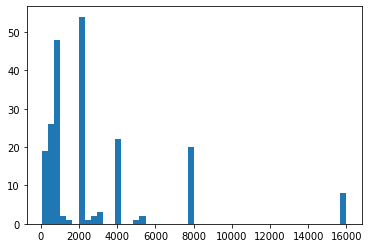

In [6]:
# Наблюдаем проблему №4 - выброс в районе 32000. Применяем отсечение с разрешенным интервалом от 0 до 16000.
data = numpy.clip(data, 0, 16000)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

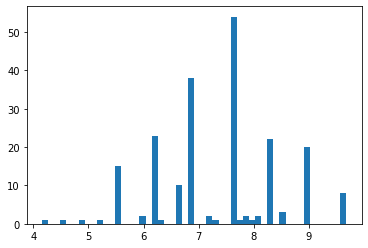

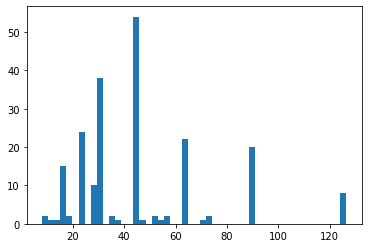

In [7]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Попробуем применить к данным логарифм и извлечение квадратного корня.
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [8]:
# Логарифм даёт более равномерно распределенные данные, используем его
data = numpy.log(data)

In [9]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

4.1588830833596715
9.680344001221918


In [10]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

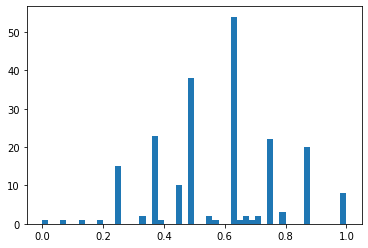

In [11]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

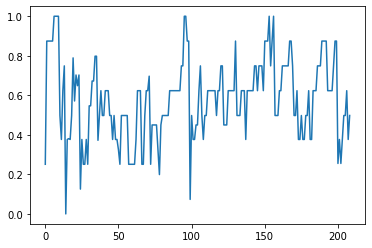

In [12]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [13]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [14]:
# Конвертируем в одномерный массив
data = data.flatten()

In [15]:
# Сохраняем в итоговом наборе данных
dataset['MMIN'] = data

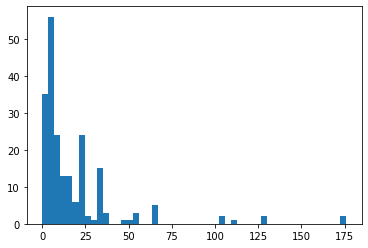

In [16]:
# Обработка данных в столбце №7 (CHMAX: maximum channels in units (integer))

# Загружаем данные
data = raw_dataset[7]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

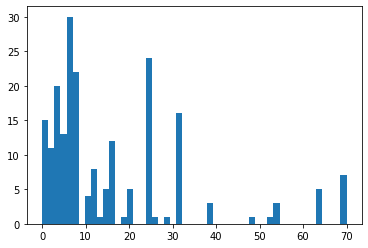

In [17]:
# Наблюдаем проблему №4 - выбросы значений в интервале (100, 175). Применяем отсечение с разрешенным интервалом от 0 до 70.
data = numpy.clip(data, 0, 70)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

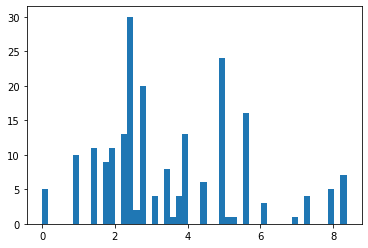

In [18]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Применять логарифм нельзя, т.к. среди значений есть нули.
# Применим извлечение квадратного корня.

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [19]:
data = data ** 0.5

In [20]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

0.0
8.366600265340756


In [21]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

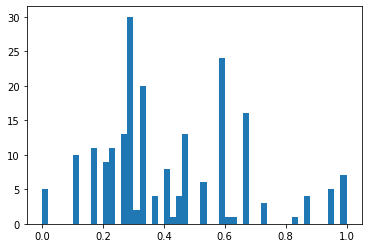

In [22]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

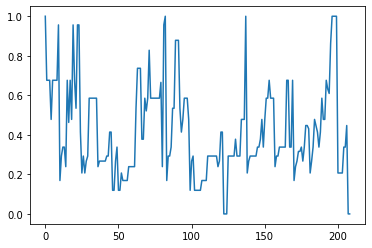

In [23]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [24]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [25]:
# Конвертируем в одномерный массив
data = data.flatten()

In [26]:
# Сохраняем в итоговом наборе данных
dataset['CHMAX'] = data

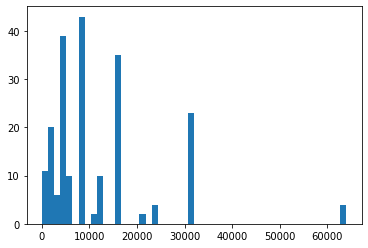

In [27]:
# Загружаем данные
data = raw_dataset[4]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

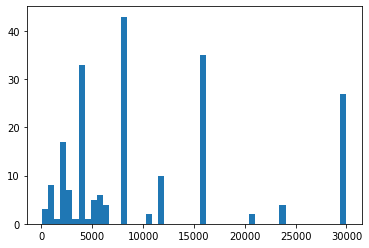

In [28]:
# Наблюдаем проблему №4 - выброс в районе 32000. Применяем отсечение с разрешенным интервалом от 0 до 30000.
data = numpy.clip(data, 0, 30000)

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

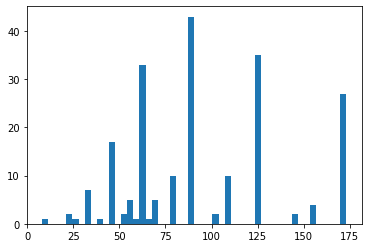

In [29]:
matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [30]:
# квадратный корень даёт более равномерно распределенные данные, используем его
data = (data ** 0.5)

In [31]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

In [32]:
# Конвертируем в одномерный массив
data = data.flatten()

In [33]:
# Сохраняем в итоговом наборе данных
dataset['MMAX'] = data
dataset.head(10)

,MMIN,CHMAX,MMAX
0,0.251074,1.000000,0.420445
1,0.874463,0.676123,1.000000
2,0.874463,0.676123,1.000000
3,0.874463,0.676123,1.000000
4,0.874463,0.478091,0.717236
5,0.874463,0.676123,1.000000
6,1.000000,0.676123,1.000000
7,1.000000,0.676123,1.000000
8,1.000000,0.676123,1.000000
9,1.000000,0.956183,1.000000


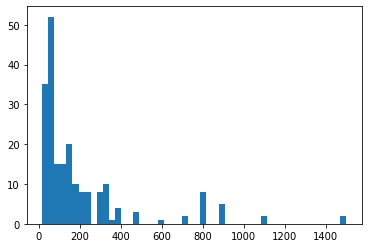

In [34]:
# Загружаем данные
data = raw_dataset[2]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

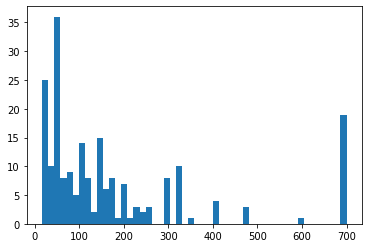

In [35]:
# Наблюдаем проблему №2 - выброс в районе 700. Применяем отсечение с разрешенным интервалом от 0 до 700.
data = numpy.clip(data, 0, 700)

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

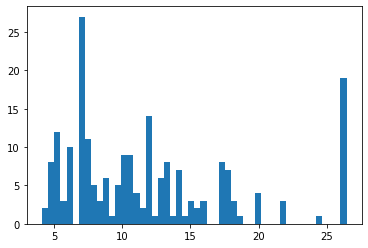

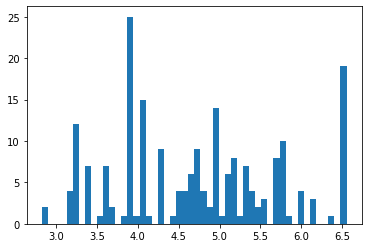

In [36]:
matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

In [37]:
# логарифм даёт более равномерно распределенные данные, используем его
data = numpy.log(data)

In [38]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

In [39]:
# Конвертируем в одномерный массив
data = data.flatten()

In [40]:
# Сохраняем в итоговом наборе данных
dataset['MYCT'] = data
dataset.head(10)

,MMIN,CHMAX,MMAX,MYCT
0,0.251074,1.000000,0.420445,0.536625
1,0.874463,0.676123,1.000000,0.143653
2,0.874463,0.676123,1.000000,0.143653
3,0.874463,0.676123,1.000000,0.143653
4,0.874463,0.478091,0.717236,0.143653
5,0.874463,0.676123,1.000000,0.114281
6,1.000000,0.676123,1.000000,0.081305
7,1.000000,0.676123,1.000000,0.081305
8,1.000000,0.676123,1.000000,0.081305
9,1.000000,0.956183,1.000000,0.081305


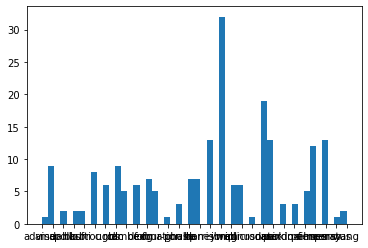

In [41]:
# Загружаем данные
data = raw_dataset[0]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

In [42]:
#проблема №6
data = pandas.get_dummies(data)

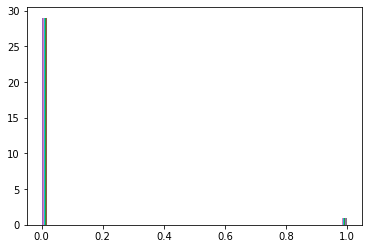

In [43]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

In [44]:
dataset = dataset.join(data)

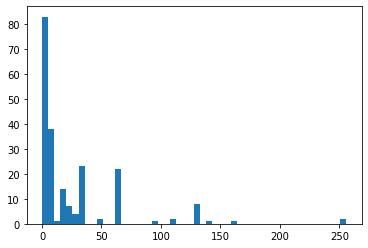

In [45]:
# Загружаем данные
data = raw_dataset[5]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

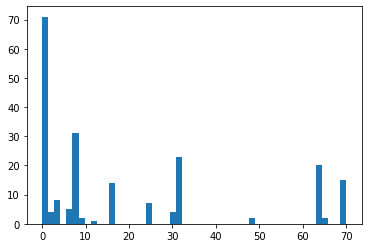

In [46]:
# Наблюдаем проблему №2 - выброс в районе 70. Применяем отсечение с разрешенным интервалом от 0 до 70.
data = numpy.clip(data, 0, 70)

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

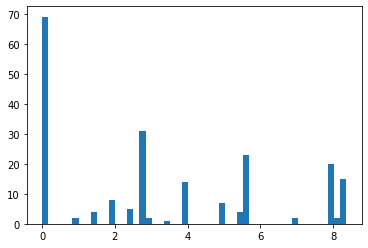

In [47]:
matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [48]:
# квадратны корень даёт более равномерно распределенные данные, используем его
data = data ** 0.5

In [49]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

In [50]:
# Конвертируем в одномерный массив
data = data.flatten()

In [51]:
# Сохраняем в итоговом наборе данных
dataset['CACH'] = data
dataset.head(10)

,MMIN,CHMAX,MMAX,MYCT,adviser,amdahl,apollo,basf,bti,burroughs,...,nas,ncr,nixdorf,perkin-elmer,prime,siemens,sperry,sratus,wang,CACH
0,0.251074,1.000000,0.420445,0.536625,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
1,0.874463,0.676123,1.000000,0.143653,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.676123
2,0.874463,0.676123,1.000000,0.143653,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.676123
3,0.874463,0.676123,1.000000,0.143653,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.676123
4,0.874463,0.478091,0.717236,0.143653,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.676123
5,0.874463,0.676123,1.000000,0.114281,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.956183
6,1.000000,0.676123,1.000000,0.081305,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.956183
7,1.000000,0.676123,1.000000,0.081305,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.956183
8,1.000000,0.676123,1.000000,0.081305,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.956183
9,1.000000,0.956183,1.000000,0.081305,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000


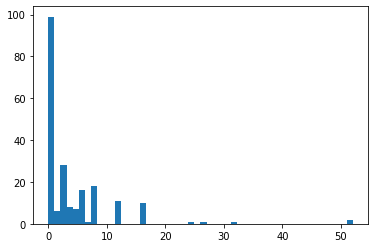

In [52]:
# Загружаем данные
data = raw_dataset[6]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

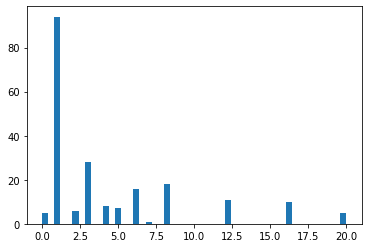

In [53]:
# Наблюдаем проблему №2 - выброс в районе 20. Применяем отсечение с разрешенным интервалом от 0 до 20.
data = numpy.clip(data, 0, 20)

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

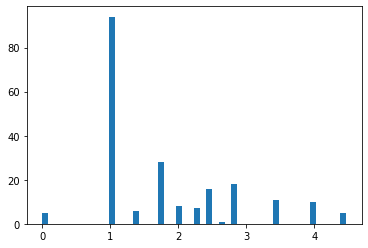

In [54]:
matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [55]:
# квадратны корень даёт более равномерно распределенные данные, используем его
data = data ** 0.5

In [56]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

In [57]:
# Конвертируем в одномерный массив
data = data.flatten()

In [58]:
# Сохраняем в итоговом наборе данных
dataset['CHMIN'] = data
dataset.head(10)

,MMIN,CHMAX,MMAX,MYCT,adviser,amdahl,apollo,basf,bti,burroughs,...,ncr,nixdorf,perkin-elmer,prime,siemens,sperry,sratus,wang,CACH,CHMIN
0,0.251074,1.000000,0.420445,0.536625,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.000000,0.894427
1,0.874463,0.676123,1.000000,0.143653,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.676123,0.632456
2,0.874463,0.676123,1.000000,0.143653,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.676123,0.632456
3,0.874463,0.676123,1.000000,0.143653,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.676123,0.632456
4,0.874463,0.478091,0.717236,0.143653,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.676123,0.632456
5,0.874463,0.676123,1.000000,0.114281,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.956183,0.632456
6,1.000000,0.676123,1.000000,0.081305,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.956183,0.894427
7,1.000000,0.676123,1.000000,0.081305,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.956183,0.894427
8,1.000000,0.676123,1.000000,0.081305,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.956183,0.894427
9,1.000000,0.956183,1.000000,0.081305,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1.000000,1.000000


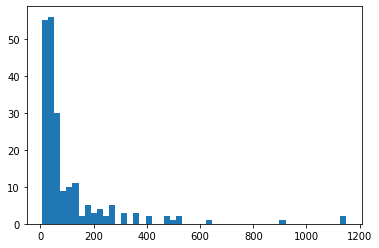

In [59]:
# Загружаем данные
data = raw_dataset[8]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

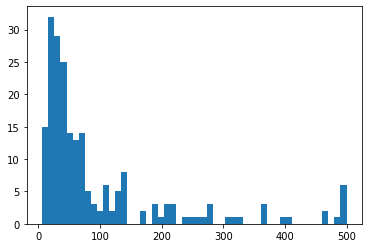

In [60]:
# Наблюдаем проблему №2 - выброс в районе 500. Применяем отсечение с разрешенным интервалом от 0 до 500.
data = numpy.clip(data, 0, 500)

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

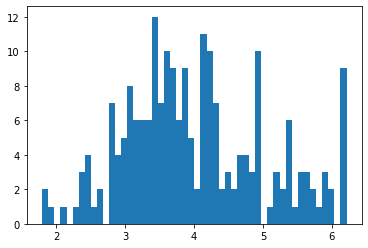

In [61]:
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

In [62]:
# логарифм даёт более равномерно распределенные данные, используем его
data = numpy.log(data)

In [63]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = StandardScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

In [64]:
# Конвертируем в одномерный массив
data = data.flatten()

In [65]:
# Сохраняем в итоговом наборе данных
dataset['PRP'] = data
dataset.head(10)

,MMIN,CHMAX,MMAX,MYCT,adviser,amdahl,apollo,basf,bti,burroughs,...,nixdorf,perkin-elmer,prime,siemens,sperry,sratus,wang,CACH,CHMIN,PRP
0,0.251074,1.000000,0.420445,0.536625,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.000000,0.894427,1.243460
1,0.874463,0.676123,1.000000,0.143653,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.676123,0.632456,1.545114
2,0.874463,0.676123,1.000000,0.143653,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.676123,0.632456,1.347173
3,0.874463,0.676123,1.000000,0.143653,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.676123,0.632456,1.104887
4,0.874463,0.478091,0.717236,0.143653,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.676123,0.632456,0.844332
5,0.874463,0.676123,1.000000,0.114281,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.956183,0.632456,1.709839
6,1.000000,0.676123,1.000000,0.081305,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.956183,0.894427,1.850910
7,1.000000,0.676123,1.000000,0.081305,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.956183,0.894427,2.133425
8,1.000000,0.676123,1.000000,0.081305,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.956183,0.894427,2.155323
9,1.000000,0.956183,1.000000,0.081305,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1.000000,1.000000,2.155323


In [66]:
dataset.to_csv('prepared_data.csv')